In [ ]:
# Mount Google Drive to access the data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

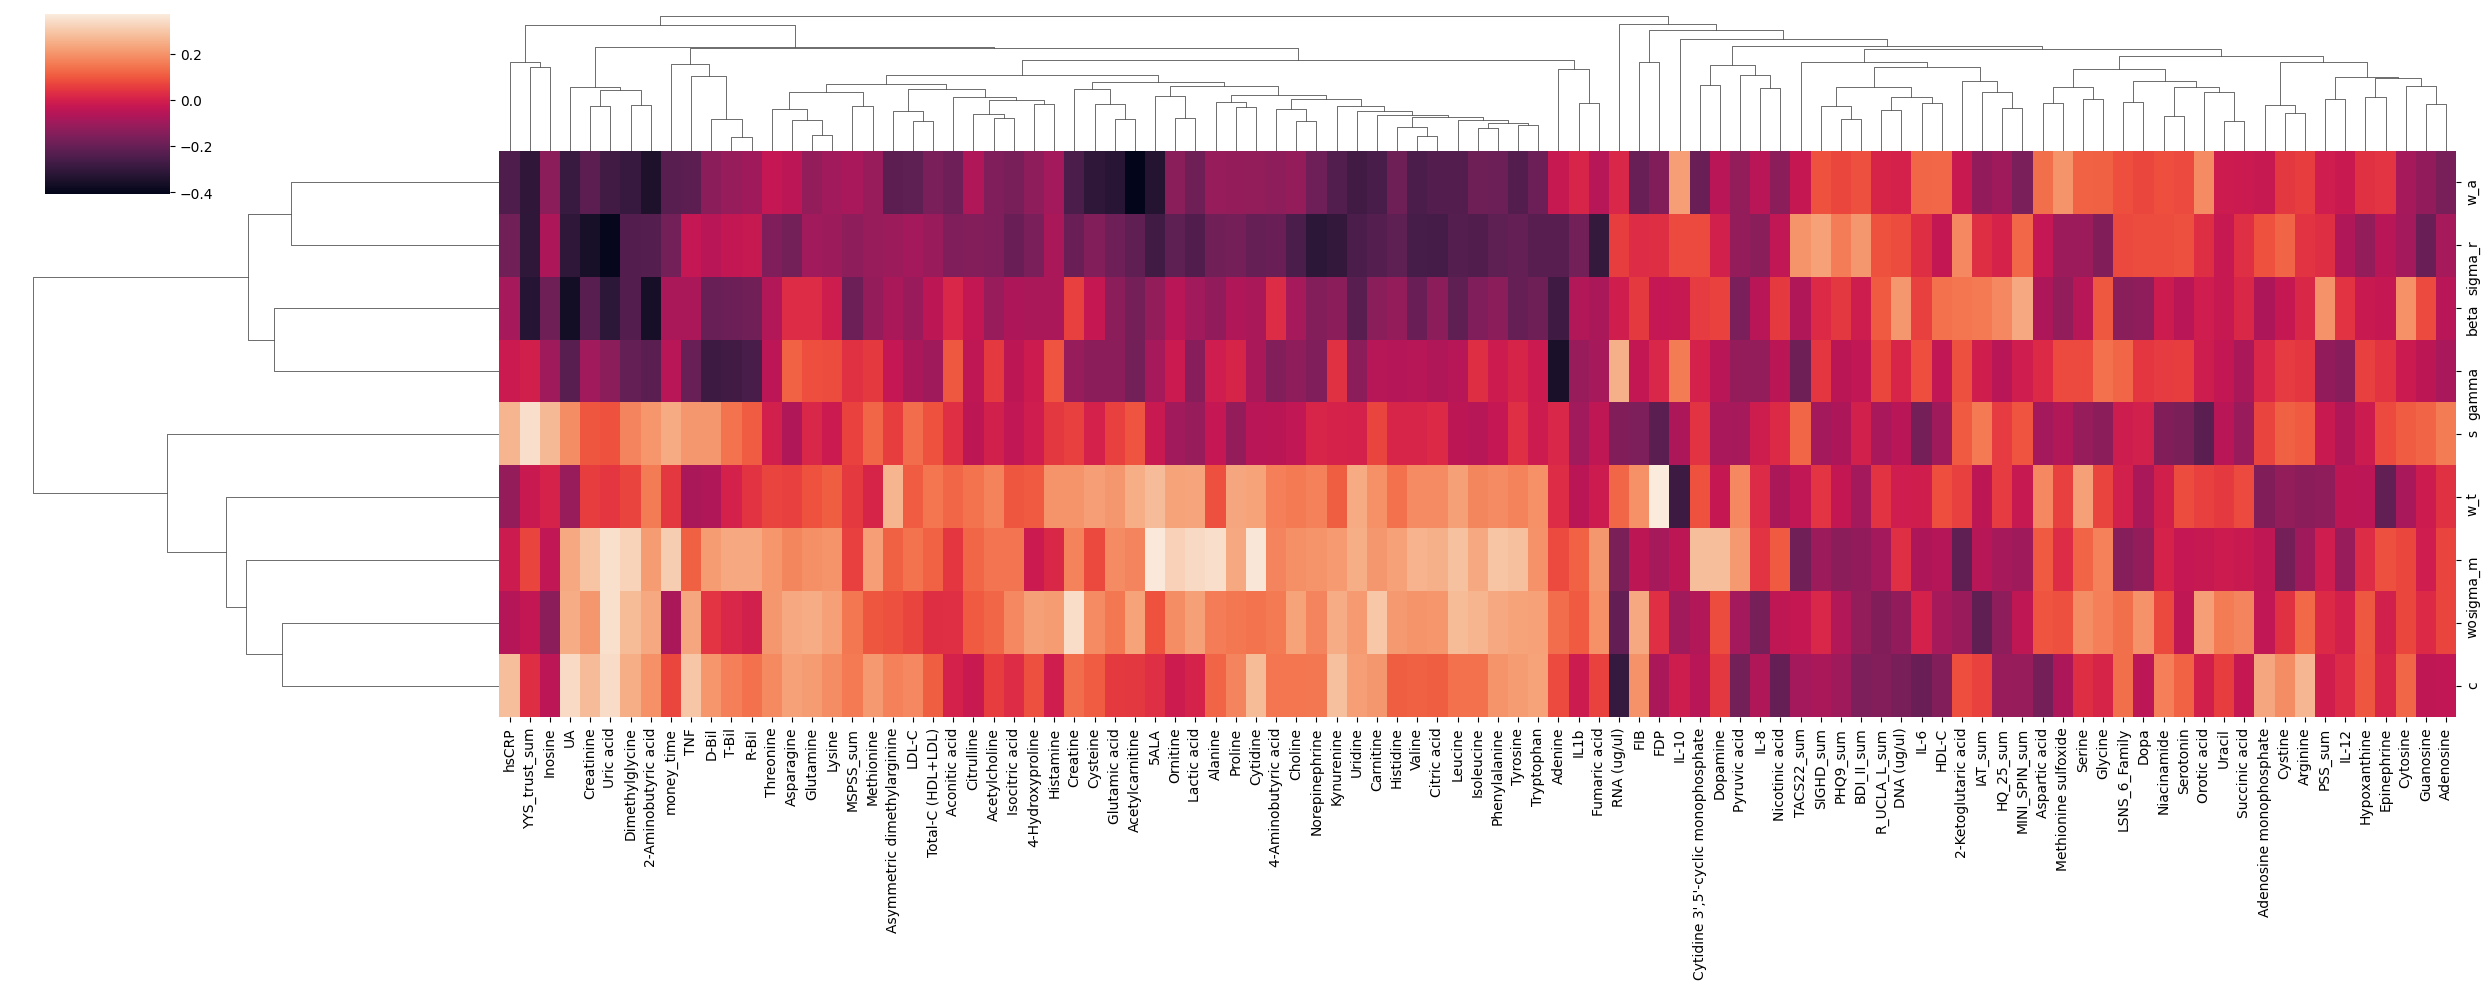

In [ ]:
# Load the correlation data from Google Drive
corr_para = pd.read_excel('/content/drive/MyDrive/hikikomoridata/corr_230214.xlsx', index_col=0)

# Display a clustered heatmap of the correlation data
sns.clustermap(corr_para, figsize=(25, 10))

In [ ]:
# Load the entropy data from Google Drive
entropy_post = pd.read_excel('/content/drive/MyDrive/hikikomoridata/hcdp_post_232227.xlsx')

# Preprocess the data by removing rows with 'm_entropy' less than 1.5 and keeping rows with non-NaN 'YYS_trust_sum'
post = entropy_post.drop(entropy_post[entropy_post['m_entropy']<1.5].index)
postall = post[post['YYS_trust_sum'].notna()]

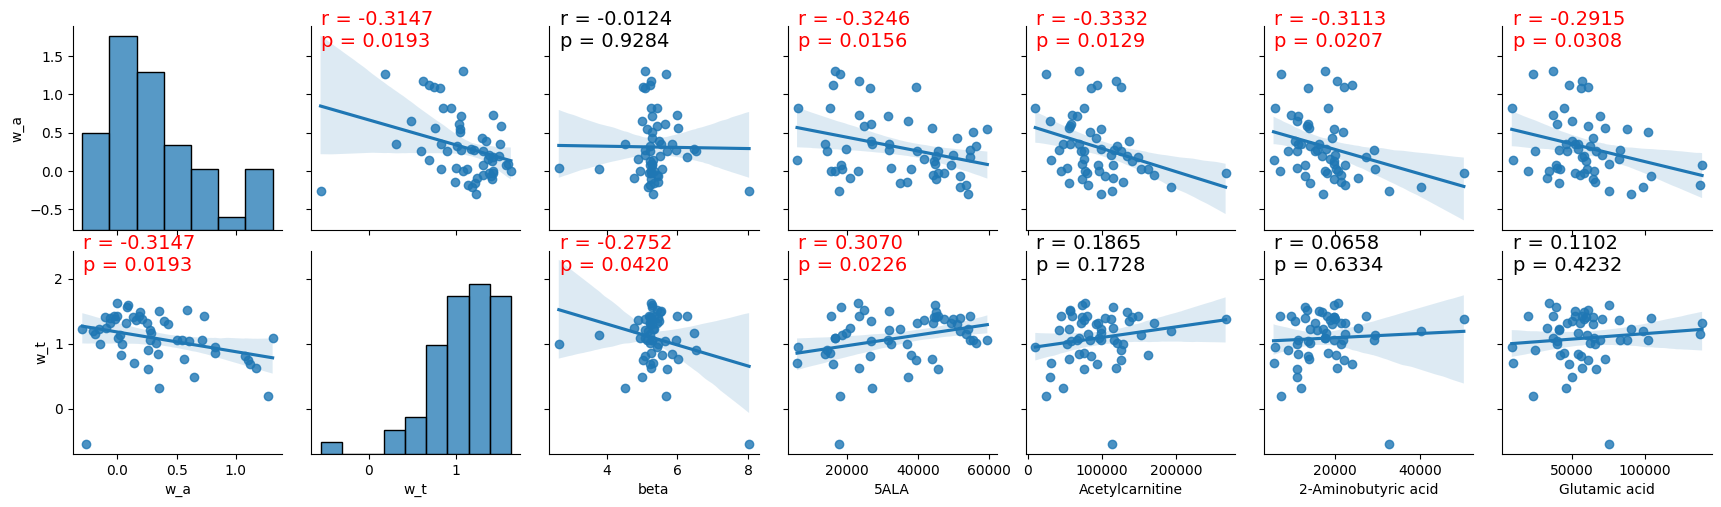

In [ ]:
# Define lists of variables for correlation analysis
wacorr=['w_a','5ALA','Acetylcarnitine','2-Aminobutyric acid','Glutamic acid']
wtcorr=['w_t', 'Arginine','w_a','Cystine','Lactic acid','5ALA']
alphacoor=['beta','Glycine','2-Aminobutyric acid','Uric acid']
biomarker = ['w_a', 'w_t', 'beta','5ALA','Acetylcarnitine','2-Aminobutyric acid', 'Glutamic acid']


# Define a function to annotate each subplot with the correlation coefficient and p-value
def annotate_r(x, y, **kws):
    r, p = pearsonr(x, y)  # Calculate Pearson correlation coefficient
    ax = plt.gca()  # Get the current axis
    color = 'red' if abs(r) > 0.25 else 'black'  # Choose color based on the magnitude of r
    ax.text(.05, .9, f'r = {r:.4f}\np = {p:.4f}', transform=ax.transAxes, fontsize=14, color=color)  # Annotate the plot

# Create a grid of scatter plots to show relationships between variables
g = sns.PairGrid(postall, y_vars=['w_a', 'w_t'], x_vars=biomarker)
g.map_offdiag(sns.regplot)  # Use regression plots for off-diagonal plots
g.map_offdiag(annotate_r)  # Annotate off-diagonal plots with correlation coefficient and p-value
g.map_diag(sns.histplot)  # Use histograms for diagonal plots

# Adjust the font size of the axis labels
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 14

# Display the plots
plt.show()
